# 1D DFT

$$X_k = \sum_{n=0}^{N-1} x_n \exp \biggl( -\frac{2 \pi i k n}{N} \biggr)$$
$$x_n = \frac{1}{N}\sum_{k=0}^{N-1} X_k \exp \biggl( \frac{2 \pi i k n}{N} \biggr)$$

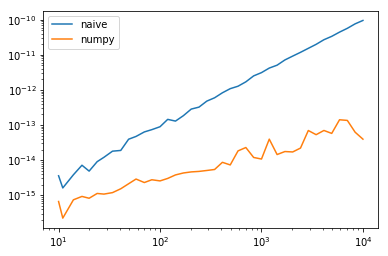

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def dft(x):
    N = len(x)
    idxs = np.arange(N)
    M = np.exp(-2*np.pi *1j / N * np.outer(idxs, idxs))
    return M.dot(x)

def idft(x):
    N = len(x)
    idxs = np.arange(N)
    M = np.exp(2*np.pi *1j / N * np.outer(idxs, idxs))
    return np.real(M.dot(x)) / N

nTrial = 40
nDataLst = (10 ** np.linspace(1, 4, nTrial)).astype(int)
acc = np.zeros(nTrial)
accNumpy = np.zeros(nTrial)
for i in range(nTrial):
    data = np.random.normal(0, 1, nDataLst[i])    
    acc[i] = np.linalg.norm(data - idft(dft(data)))
    accNumpy[i] = np.linalg.norm(data - np.fft.ifft(np.fft.fft(data)))

plt.figure()
plt.loglog(nDataLst, acc, label='naive')
plt.loglog(nDataLst, accNumpy, label='numpy')
plt.legend()
plt.show()

In [14]:
print(np.linalg.norm(dft(data) - np.fft.fft(data)))

1.4016370400911302e-08


# 2D DFT

$$X_{kl} = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} x_{mn} \exp \biggl( -2 \pi i \biggl ( \frac{km}{M} + \frac{ln}{N} \biggr ) \biggr)$$

$$x_{mn} = \frac{1}{MN} \sum_{k=0}^{M-1} \sum_{l=0}^{N-1} X_{kl} \exp \biggl( 2 \pi i \biggl ( \frac{km}{M} + \frac{ln}{N} \biggr ) \biggr)$$

In [17]:
def dft2(x):
    M, N = x.shape
    idxsX = np.arange(M)
    idxsY = np.arange(N)
    matM = np.exp(-2*np.pi * 1j / M * np.outer(idxsX, idxsX))
    matN = np.exp(-2*np.pi * 1j / N * np.outer(idxsY, idxsY))
    return np.einsum("mn, km, ln", x, matM, matN)

def idft2(x):
    (M, N) = x.shape
    idxsX = np.arange(M)
    idxsY = np.arange(N)
    matM = np.exp(2*np.pi * 1j / M * np.outer(idxsX, idxsX))
    matN = np.exp(2*np.pi * 1j / N * np.outer(idxsY, idxsY))
    return np.einsum("kl, km, ln", x, matM, matN) / (M*N)

data = np.random.normal(0, 1, (30,30))
print(np.linalg.norm(data - idft2(dft2(data))))
print(np.linalg.norm(dft2(data) - np.fft.fft2(data)))

1.5747526593406555e-13
7.701475065840632e-12
